<a href="https://colab.research.google.com/github/Lidiia-Afanasieva/LettersClassification/blob/main/LettersClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import ast
import torch
import numpy as np
import matplotlib.pyplot as plt
from random import randint as randint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
class Network(torch.nn.Module):
    def __init__(self, hidden_neurons):
        super(Network, self).__init__()
        self.fc1 = torch.nn.Linear(35, hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(hidden_neurons, Np)

    # определяет, каким образом данные проходят по сети
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

In [3]:
def loss(pred, target):
    ans = (pred - target)**2
    return ans.mean()

In [10]:
def make_noise(inp):
    num_point = 5
    for i in range(len(inp)):
        for j in range(num_point):
            rand = randint(0, 34)
            ns = inp[i][rand]
            if int(ns) == 1:
                inp[i][rand] = 0.
            else: inp[i][rand] = 1.
    return inp


# **Без шумов**

In [20]:
text = open('prprob0.txt', 'r')
data = np.array([ast.literal_eval(line.strip(',\n')) for line in text if line.strip()])
data = data.astype(np.float32)
data = data.reshape(26, 35)

Nv = 6
Np = 10
inp = torch.from_numpy(data[Nv:Nv+Np, :])
out = torch.from_numpy(np.eye(Np))

In [21]:
our_network = Network(10)
optimizer = torch.optim.Adam(our_network.parameters(), 0.01)

In [22]:
for i in range(200):
    optimizer.zero_grad()
    y_pred = our_network.forward(inp)
    loss_val = loss(y_pred, out)
    loss_val.backward()
    optimizer.step()
    if(i%20 == 0):
        y_pred = our_network.forward(inp)
        print((((y_pred - out)**2).mean())**0.5)

tensor(0.3893, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.2632, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.2201, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.1814, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.1538, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.1309, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.1065, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.0824, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.0608, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.0424, dtype=torch.float64, grad_fn=<PowBackward0>)


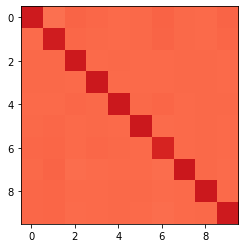

In [23]:
out_nn = our_network.forward(inp)
out_nn = out_nn.detach().numpy()

plt.clf()
plt.imshow(out_nn, cmap='Reds', clim=(-2,2))

# **Проверка работы НС на зашумленных данных**

In [30]:
data = data.astype(np.float32)
data = data.reshape(26, 35)

Nv = 6
Np = 10
inp_noise = data[Nv:Nv+Np, :]
inp_noise = make_noise(inp_noise)
inp_noise = torch.from_numpy(inp_noise)
out_noise = torch.from_numpy(np.eye(Np))

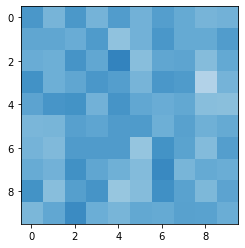

In [31]:
out_nn_noise = our_network.forward(inp_noise)
out_nn_noise = out_nn_noise.detach().numpy()

plt.clf()
plt.imshow(out_nn_noise, cmap='Blues', clim=(-2,2))

# **НС обученная на зашумленных данных**

In [11]:
text = open('prprob0.txt', 'r')
data = np.array([ast.literal_eval(line.strip(',\n')) for line in text if line.strip()])
data = data.astype(np.float32)
data = data.reshape(26, 35)

Nv = 6
Np = 10
inp_noise = data[Nv:Nv+Np, :]
inp_noise = make_noise(inp_noise)
inp_noise = torch.from_numpy(inp_noise)
out_noise = torch.from_numpy(np.eye(Np))

In [12]:
our_network_noise = Network(10)
optimizer_noise = torch.optim.Adam(our_network_noise.parameters(), 0.01)

In [ ]:
for i in range(200):
    optimizer_noise.zero_grad()
    y_pred = our_network_noise.forward(inp_noise)
    loss_val = loss(y_pred, out_noise)
    loss_val.backward()
    optimizer_noise.step()
    if(i%20 == 0):
        y_pred = our_network_noise.forward(inp_noise)
        print((((y_pred - out_noise)**2).mean())**0.5)

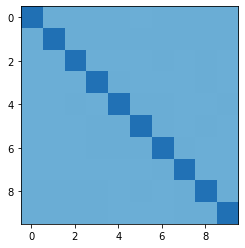

In [14]:
out_nn_noise = our_network_noise.forward(inp_noise)
out_nn_noise = out_nn_noise.detach().numpy()

plt.clf()
plt.imshow(out_nn_noise, cmap='Blues', clim=(-2,2))